<a href="https://colab.research.google.com/github/aln21-ua/TFM-PINNs/blob/main/Implementacion/Ecuacion%20de%20onda/0_Solucion_analitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [ ]:
# Cálculo numérico
import numpy as np

# Representación y animación
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Visualización de la animación en Colab
from IPython.display import HTML

# Guardar archivos en drive
mountdrive = True
if mountdrive==True:
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1- Condiciones de la simulación

## Parámetros del sistema

Dada la PDE:

$$\frac{\partial^2 u}{\partial t^2}+2\beta \frac{\partial u}{\partial t}=c^2 \frac{\partial^2 u}{\partial x^2}$$

In [ ]:
# Parámetro de la amortiguación
beta = 0.5

# Velocidad de la onda
c = 1.0

## Parámetros de cálculo
Con una longitud de cuerda $L$ y un tiempo máximo de simulación $T$.

In [ ]:
# Longitud de la cuerda
L = 1.0

# Tiempo máximo de simulación
T = 10.0

# Discretización espacial y temporal
Nx = 51  # Número de puntos espaciales
Nt = 61  # Número de puntos temporales
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

# 2- Resolución: solución analítica

Se propone la siguiente solución analítica:

$$u(x, t)= A \sin (\frac{k \pi}{L} x) e^{-\beta t} \cos \left(t \sqrt{\left(\frac{k\pi c}{L}\right)^2-\beta^2}\right)$$

$A$ es la amplitud de la cuerda y $k \in \mathbb{N}$ define el número de nodos.

In [ ]:
A = 1
k = 1
def u_analitica(x, t, L, beta, c):
    return np.sin(k*np.pi/L * x) * np.exp(-beta * t) * np.cos(np.sqrt((k*np.pi * c / L)**2 - beta**2) * t)


Que cumple lo siguiente:

## Condiciones iniciales
1. $$u(x,t=0) = A \sin (\frac{k\pi}{L} x)$$
2. $$\frac{\partial u}{\partial t} (x,t=0) = - \beta $$

## Condiciones de frontera
$$u(x=0,t)=u(x=L,t)=0$$

# 3- Cálculo de $u(x,t)$ y guardado de datos

In [ ]:
# Cálculo de todos los valores en paralelo
x_, t_ = np.meshgrid(x, t)
u_tx = u_analitica(x_, t_, L, beta, c)
# tiempo i, posición j: u_tx[i,j]

Guardar solución para otras implementaciones.

In [ ]:
if mountdrive == True:
  TFM_route = "/content/drive/MyDrive/TFM/Implementacion/"
  simulation_name = "Ecuacion de onda amortiguada/"
  np.save(TFM_route+simulation_name+"Matrices/u_tx_real.npy", u_tx)
else:
  np.save("u_tx_real.npy", u_tx)

# 4- Visualizaciones

In [ ]:
if mountdrive == True:
  TFM_route = "/content/drive/MyDrive/TFM/Implementacion/"
  simulation_name = "Ecuacion de onda amortiguada/"
  u_tx = np.load(TFM_route+simulation_name+"Matrices/u_tx_real.npy")
else:
  u_tx = np.load("u_tx_real.npy")

## Animación

In [ ]:
# Función para ctualizar animación
def actualizar(frame):
    line.set_ydata(u_tx[frame])
    tiempo_text.set_text(f't: {t[frame]:.2f}')
    return line, tiempo_text

In [ ]:
# Crear figura
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(-A*1.1, A*1.1)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Onda Amortiguada: Analítica')

# Imagen inicial
line, = ax.plot(x, u_tx[0])
tiempo_text = ax.text(0.95, 0.95, '', transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Actualizar
ani = animation.FuncAnimation(fig, actualizar, frames=Nt, interval=50, blit=True)

# Mostrar la animación en Google Colab
plt.close("all")
HTML(ani.to_jshtml())

## Mapa de calor

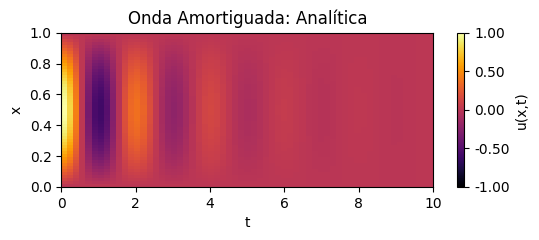

In [ ]:
plt.figure(figsize=(6, 2))
plt.imshow(u_tx[:,::-1].T, extent=[np.min(t), np.max(t), np.min(x), np.max(x)], aspect='auto', interpolation='nearest', cmap = "inferno", vmin=-A, vmax=A)
cbar = plt.colorbar(label='u(x,t)')
ticks = np.linspace(-A, A,5)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{tick:.2f}' for tick in ticks])
plt.xlabel('t')
plt.ylabel('x')
plt.ylim([0,L])
plt.title('Onda Amortiguada: Analítica')
plt.show()